In [2]:
%pylab inline 

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import networkx as nx
import random as rd

Populating the interactive namespace from numpy and matplotlib


In [3]:
def init_watts_strogatz_graph(n, k, p, l): 
    global g
    g = nx.watts_strogatz_graph(n, k, p) 
    init_network_state(l, n)

def init_powerlaw_cluster_graph(n, k, p, l): 
    global g
    g = nx.powerlaw_cluster_graph(n, k, p) 
    init_network_state(l, n)
    
def init_barabasi_albert_graph(n, k, l): 
    global g
    g = nx.barabasi_albert_graph(n, k) 
    init_network_state(l, n)
    
def init_fully_connected_network(n, l): 
    global g
    g = nx.random_regular_graph(n-1, n) 
    init_network_state(l, n)

In [42]:
def init_network_state(l, n):
    global g
    # Set up default values for attributes
    #mu, sigma = 0.5, 0.2 # mean and standard deviation
    #s = np.random.normal(mu, sigma, n)
    #s = list(s)
    for nd in g.nodes_iter():
        #print (s[nd])
        #g.node[nd]['threshold'] = s[nd]
        g.node[nd]['threshold'] = round(rd.random(), 2)
        g.node[nd]['state'] = False
    # select nodes randomly and say that it goes for riot
    i = 0
    while i < l:
        random_node_id = rd.choice(g.nodes())
        if g.node[random_node_id]['state'] == False:
            g.node[random_node_id]['state'] = True
            i += 1

In [5]:
def draw():
    global g
    colors = {}
    for nd in g.nodes():
        if g.node[nd]['state'] == True:
            colors[nd] = "red"
        else:
            colors[nd] = "blue"            
    plt.figure()
    nx.draw(g, pos=None, arrows=False, with_labels=False, node_color=list(colors.values()), node_size=20, width=0.6)
    plt.show()

In [6]:
def get_riot_nodes():
    global g
    list_of_riot_nodes = []
    nodes_state = nx.get_node_attributes(g, 'state')
    [list_of_riot_nodes.append(i) for i in nodes_state if nodes_state[i] == True]
    return list_of_riot_nodes

In [7]:
def linear_threshold_model_step():
    for nd in g.nodes_iter():
        if g.node[nd]['state'] == False:
            true_count = 0
            neighbors = g.neighbors(nd)
            for neighbor in neighbors:
                if g.node[neighbor]['state'] == True:
                    true_count += 1
            pay_off = true_count/len(neighbors)
            if pay_off >= g.node[nd]['threshold']:
                g.node[nd]['state'] = True

In [8]:
def run_linear_threshold_model():
    old_size = 0 # number of rioter nodes before simulation step
    new_size = len(get_riot_nodes()) # number of rioter nodes after simulation step
    number_rioter = [] # number of rioter nodes on every simulation step, for plotting
    
    ## repeat simulation step till the number of rioter will not change
    while old_size != new_size:
        #print (new_size, old_size)
        old_size = new_size
        linear_threshold_model_step()
        new_size = len(get_riot_nodes())
        number_rioter.append(old_size)
    return number_rioter

In [9]:
n = 3000 # Number of nodes
m =400 # Number of edges to attach from a new node to existing nodes
l = 400 # intial number of rioter
init_barabasi_albert_graph(n, m, l)

In [82]:
#S1 = run_linear_threshold_model()
#S1_steps = [i for i in range(len(S1))]
#print (S1, '\t',S1_steps)

[400, 520, 562, 574, 575] 	 [0, 1, 2, 3, 4]


In [57]:
def sim():
    S1 = run_linear_threshold_model()
    S1_steps = [i for i in range(len(S1))]
    plt.plot(S1_steps, S1)
    plt.ylabel('Proportion of rioter')
    plt.xlabel('Steps')
    plt.show()

In [60]:
init_fully_connected_network(1000, 50)

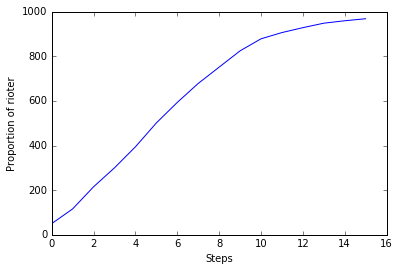

In [61]:
sim()

In fully connected graph almost all nodes go on riot, it is done in 14 steps

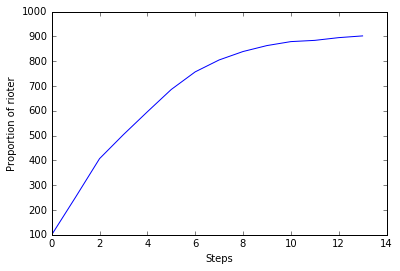

In [62]:
init_powerlaw_cluster_graph(1000, 40, 0.7, 100)
sim()

In powerlaw graph we almost see similar situation but intional number of rioter was bigger so the more initional rioters the faster riot spreds, but in power law graph riot spereds not that fast

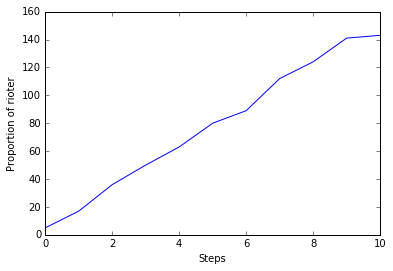

In [63]:
init_powerlaw_cluster_graph(1000, 20, 0.2, 5)
sim()

After tune in perameters in power law graph and making graph less connected we can see that riot spreads much slowly than in previous graph

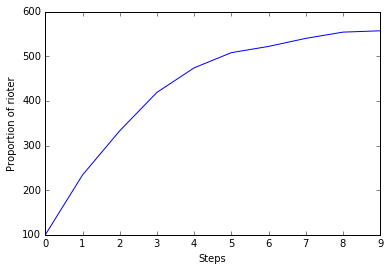

In [64]:
init_watts_strogatz_graph(1000, 40, 0.7, 100)
sim()

Watts strogatz graph doesn't spreads the riot that well.

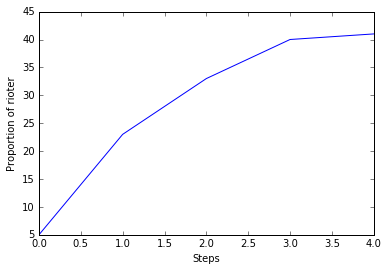

In [68]:
init_watts_strogatz_graph(1000, 20, 0.2, 5)
sim()

Above less connected watts strogats graph with less amount of rioter at the begging so riot doesn't spreads that fast 

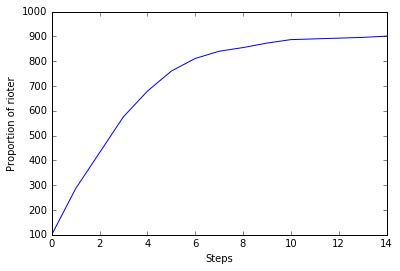

In [69]:
init_barabasi_albert_graph(1000, 40, 100)
sim()

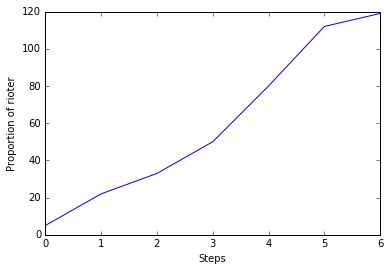

In [70]:
init_barabasi_albert_graph(1000, 20, 5)
sim()

Barabasi albert qute good for spreading. The secons version is less connected so we can see less riot 